# Import

In [1]:
import numpy as np
import pandas as pd
import nlplot
import plotly
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_colwidth', 5000)

# data load

In [2]:
df = pd.read_csv('sample_twitter.csv')

In [3]:
display(df.head(3), df.tail(3), df.shape)

searched_for                                 hashtags
0  #データサイエンティスト  筋トレ 今日の積み上げ 駆け出しエンジニアと繋がりたい データサイエンティスト
1  #データサイエンティスト      統計学 人工知能 ダイヤモンド データサイエンティスト プログラミング
2  #データサイエンティスト            データマイニング データサイエンス データサイエンティスト

searched_for                   hashtags
2710      #kaggle  featureengineering kaggle
2711      #kaggle   superintelligence kaggle
2712      #kaggle             titanic kaggle

(2713, 2)

# use nlplot

In [4]:
# 全データ・#データサイエンティスト・#kaggleをそれぞれインスタンス化
npt = nlplot.NLPlot(df, taget_col='hashtags')
npt_ds = nlplot.NLPlot(df.query('searched_for == "#データサイエンティスト"'), taget_col='hashtags')
npt_kaggle = nlplot.NLPlot(df.query('searched_for == "#kaggle"'), taget_col='hashtags')

## ストップワードの計算

In [5]:
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語（データサイエンティスト・kaggle）をストップワードに指定
stopwords = npt.get_stopword(top_n=2, min_freq=0)

In [6]:
stopwords

['kaggle', 'データサイエンティスト']

## n-grams

100%|██████████| 2713/2713 [00:00<00:00, 181749.38it/s]


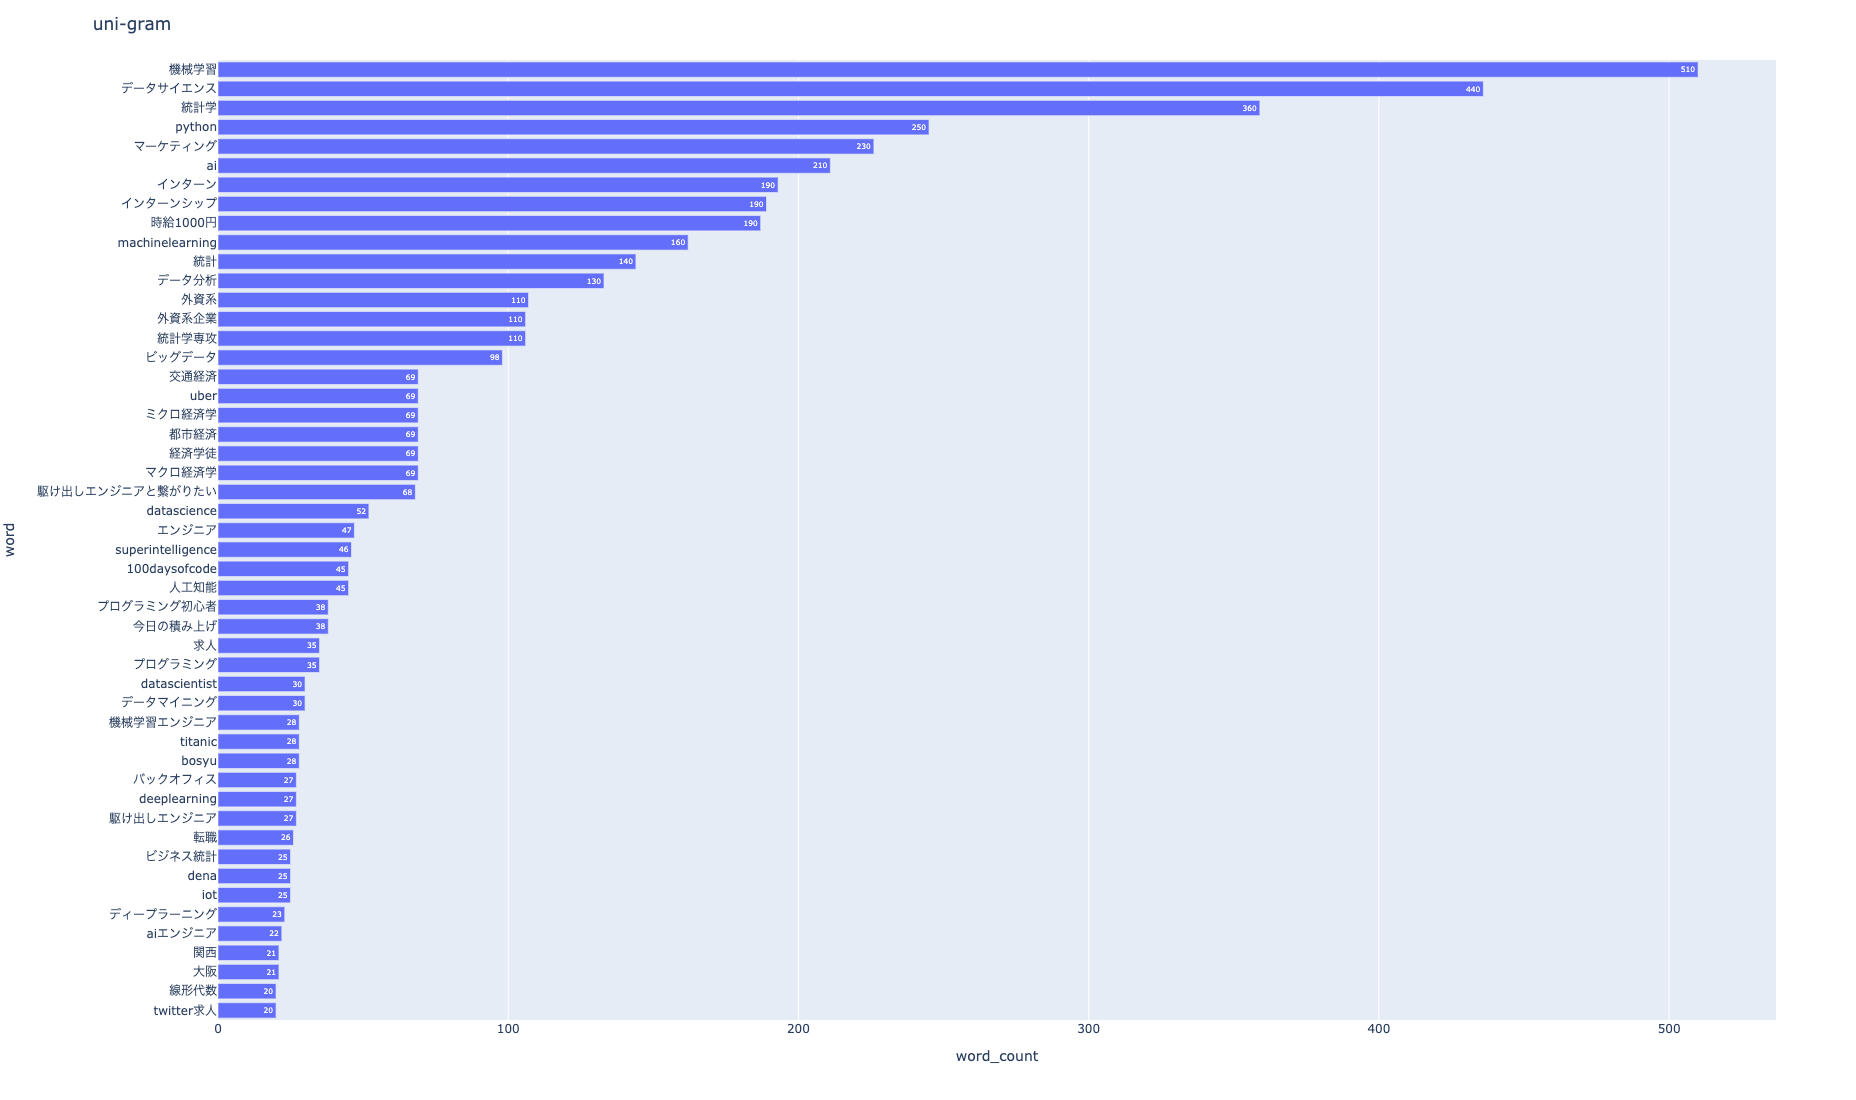

In [7]:
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

100%|██████████| 2713/2713 [00:00<00:00, 165630.50it/s]


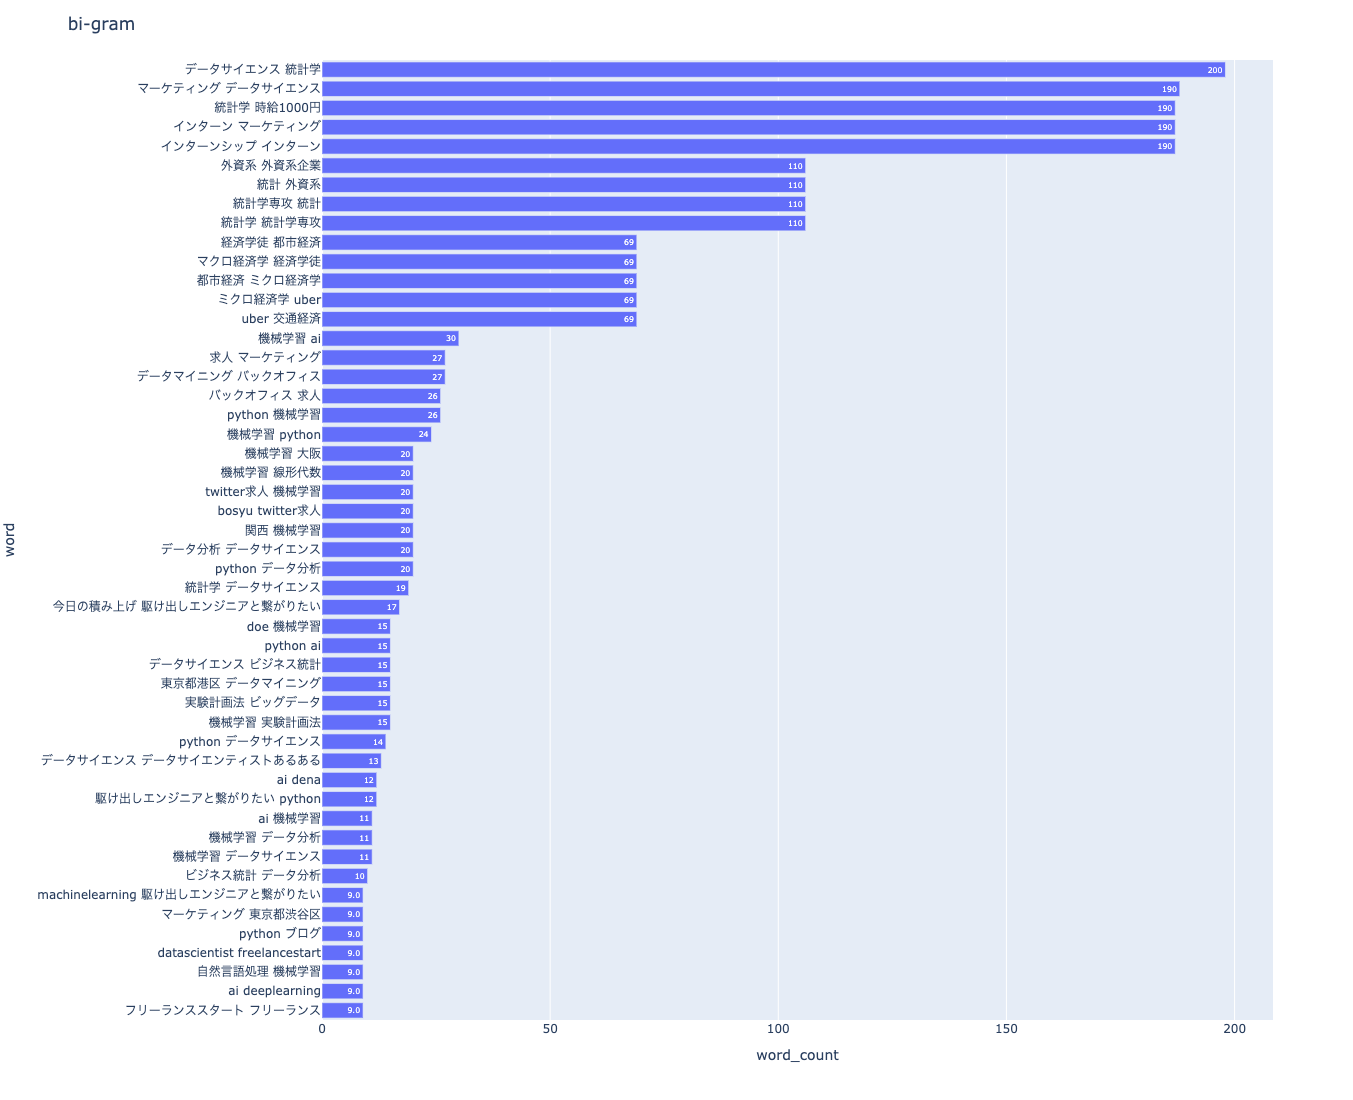

In [8]:
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

100%|██████████| 2713/2713 [00:00<00:00, 183209.58it/s]


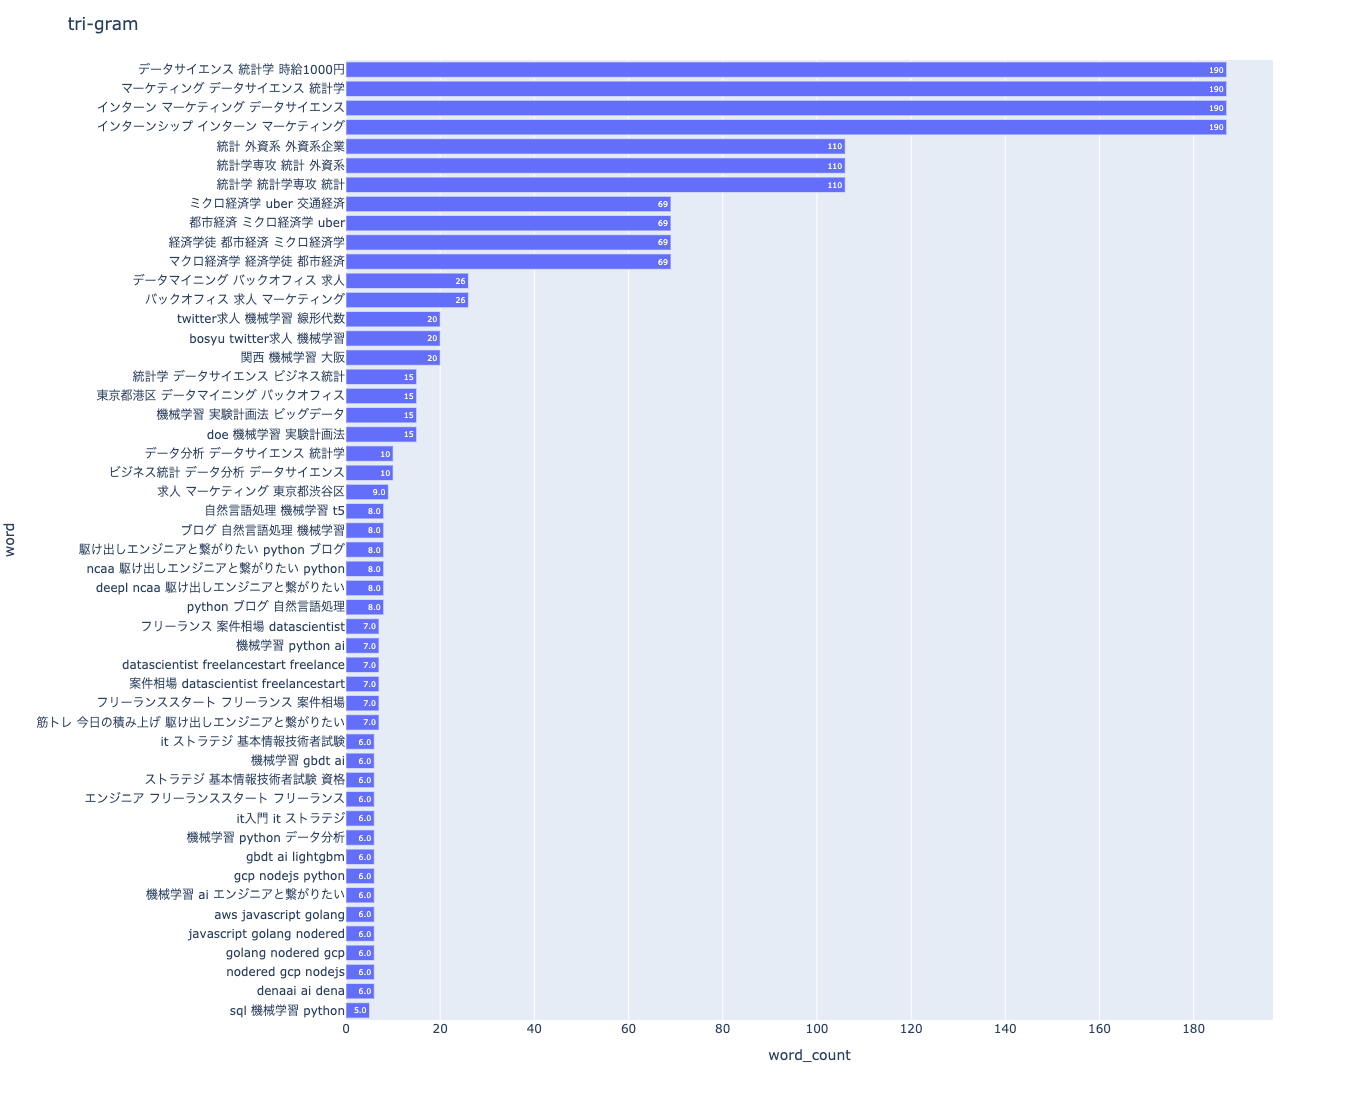

In [9]:
npt.bar_ngram(
    title='tri-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=3,
    top_n=50,
    width=1000,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

## ラベルごとに比較する

- 実際のデータ分析の場では、データの切り口を変えながら可視化したい場合がある。その場合は下記のように同時にプロットすることもできる

In [10]:
# #データサイエンティストのfigを取得
fig_unigram_ds = npt_ds.bar_ngram(
    stopwords=stopwords,
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

# #kaggleのfigを取得
fig_unigram_kaggle = npt_kaggle.bar_ngram(
    stopwords=stopwords,
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

100%|██████████| 1224/1224 [00:00<00:00, 172322.37it/s]


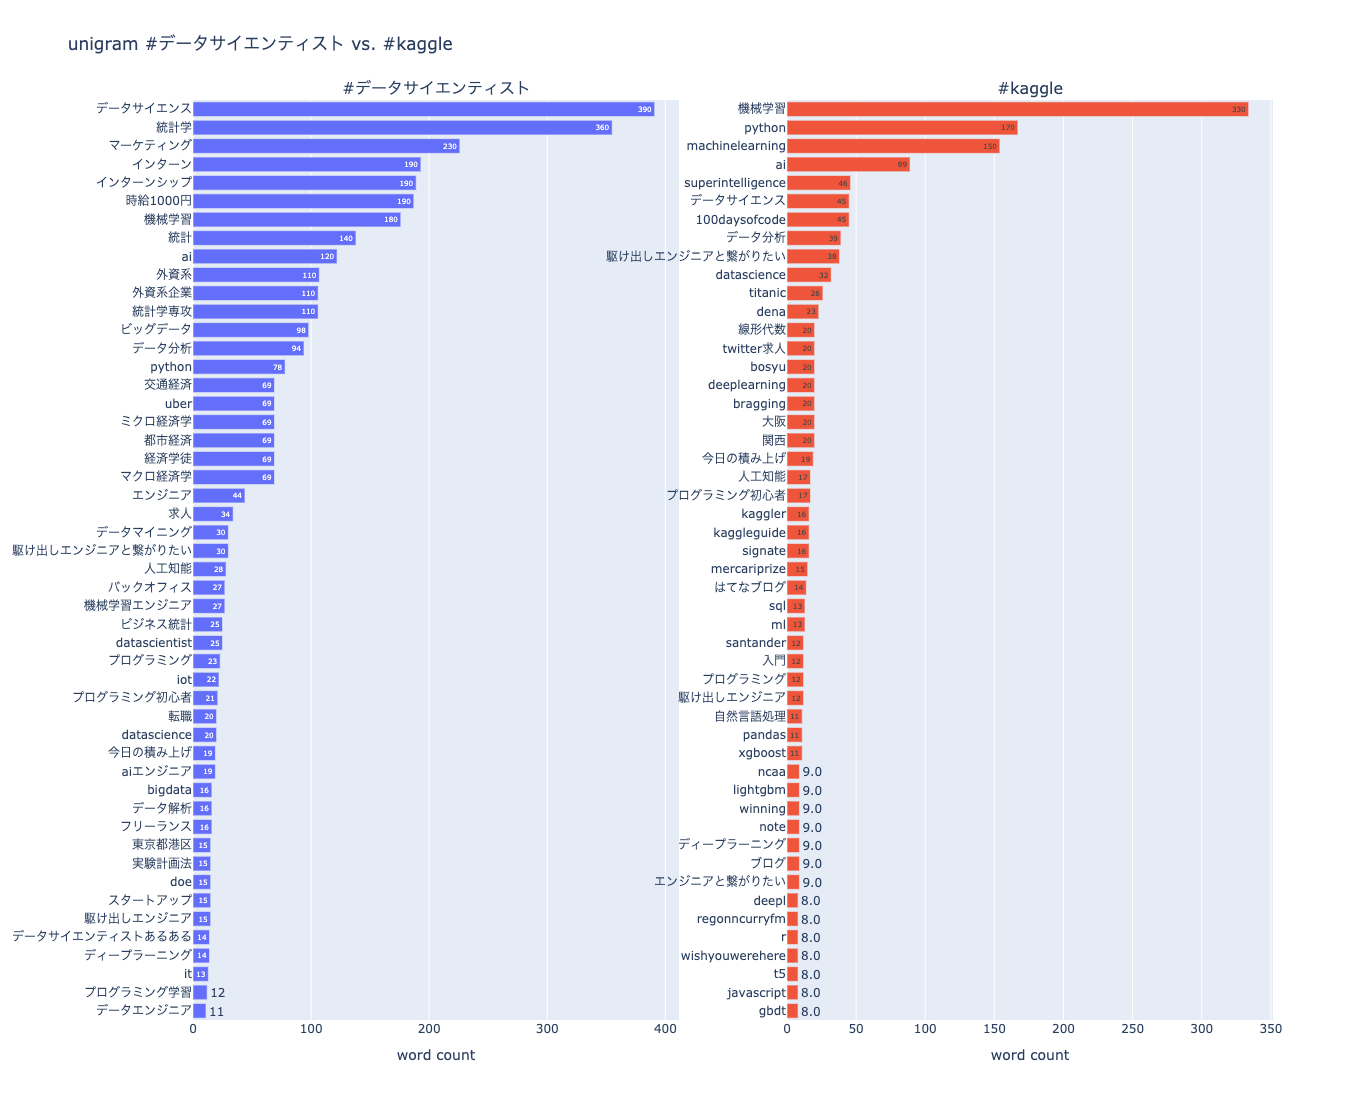

In [11]:
# subplot
trace1 = fig_unigram_ds['data'][0]
trace2 = fig_unigram_kaggle['data'][0]

fig = make_subplots(rows=1, cols=2, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=False)
fig.update_xaxes(title_text='word count', row=1, col=1)
fig.update_xaxes(title_text='word count', row=1, col=2)

fig.update_layout(height=1100, width=1900, title_text='unigram #データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

plotly.offline.plot(fig, filename='unigram #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

## 単語出現頻度の分布

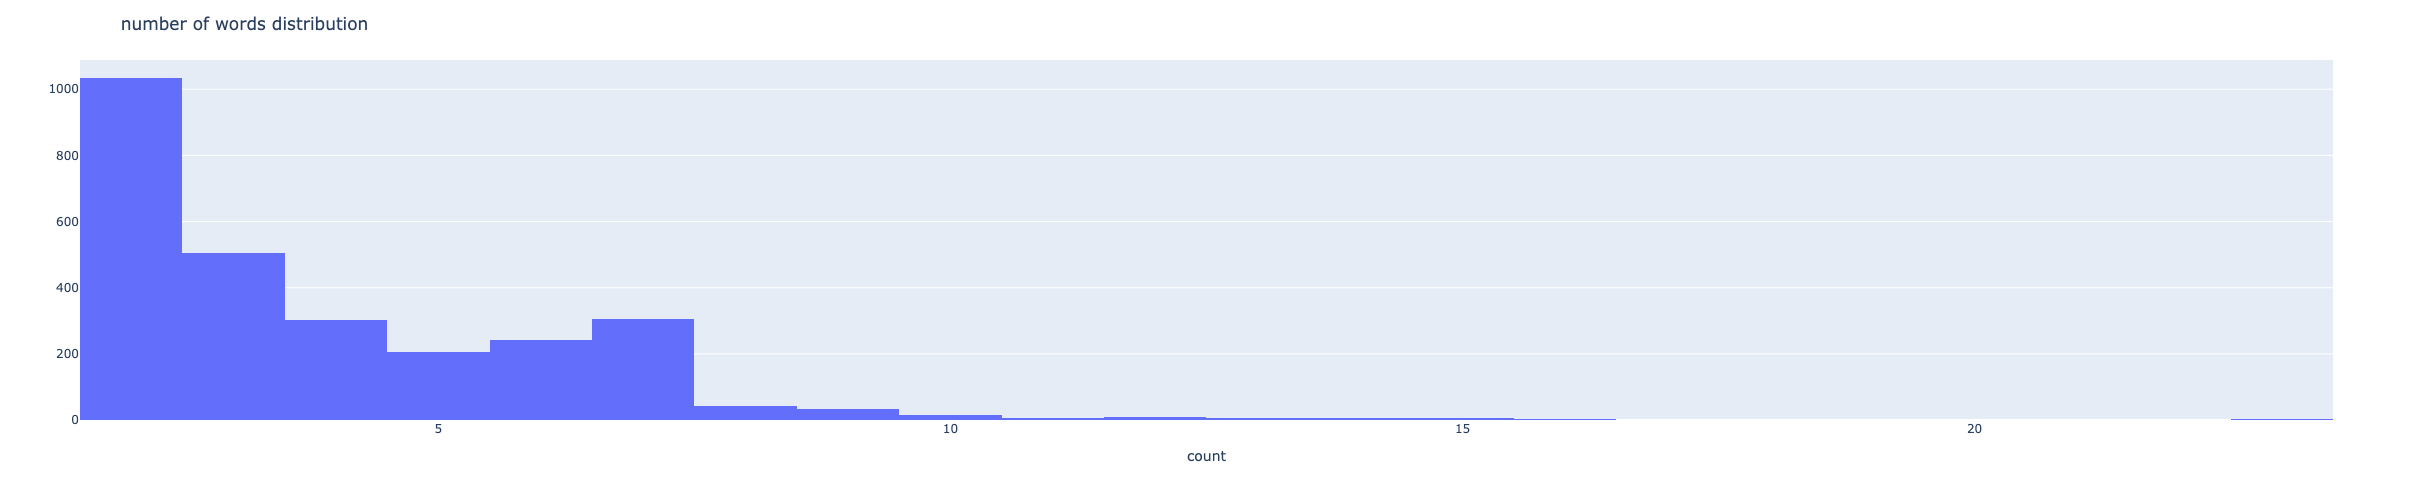

In [14]:
# 単語数の分布
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

## ラベル毎

In [15]:
fig_wd_ds = npt_ds.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

fig_wd_kaggle = npt_kaggle.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

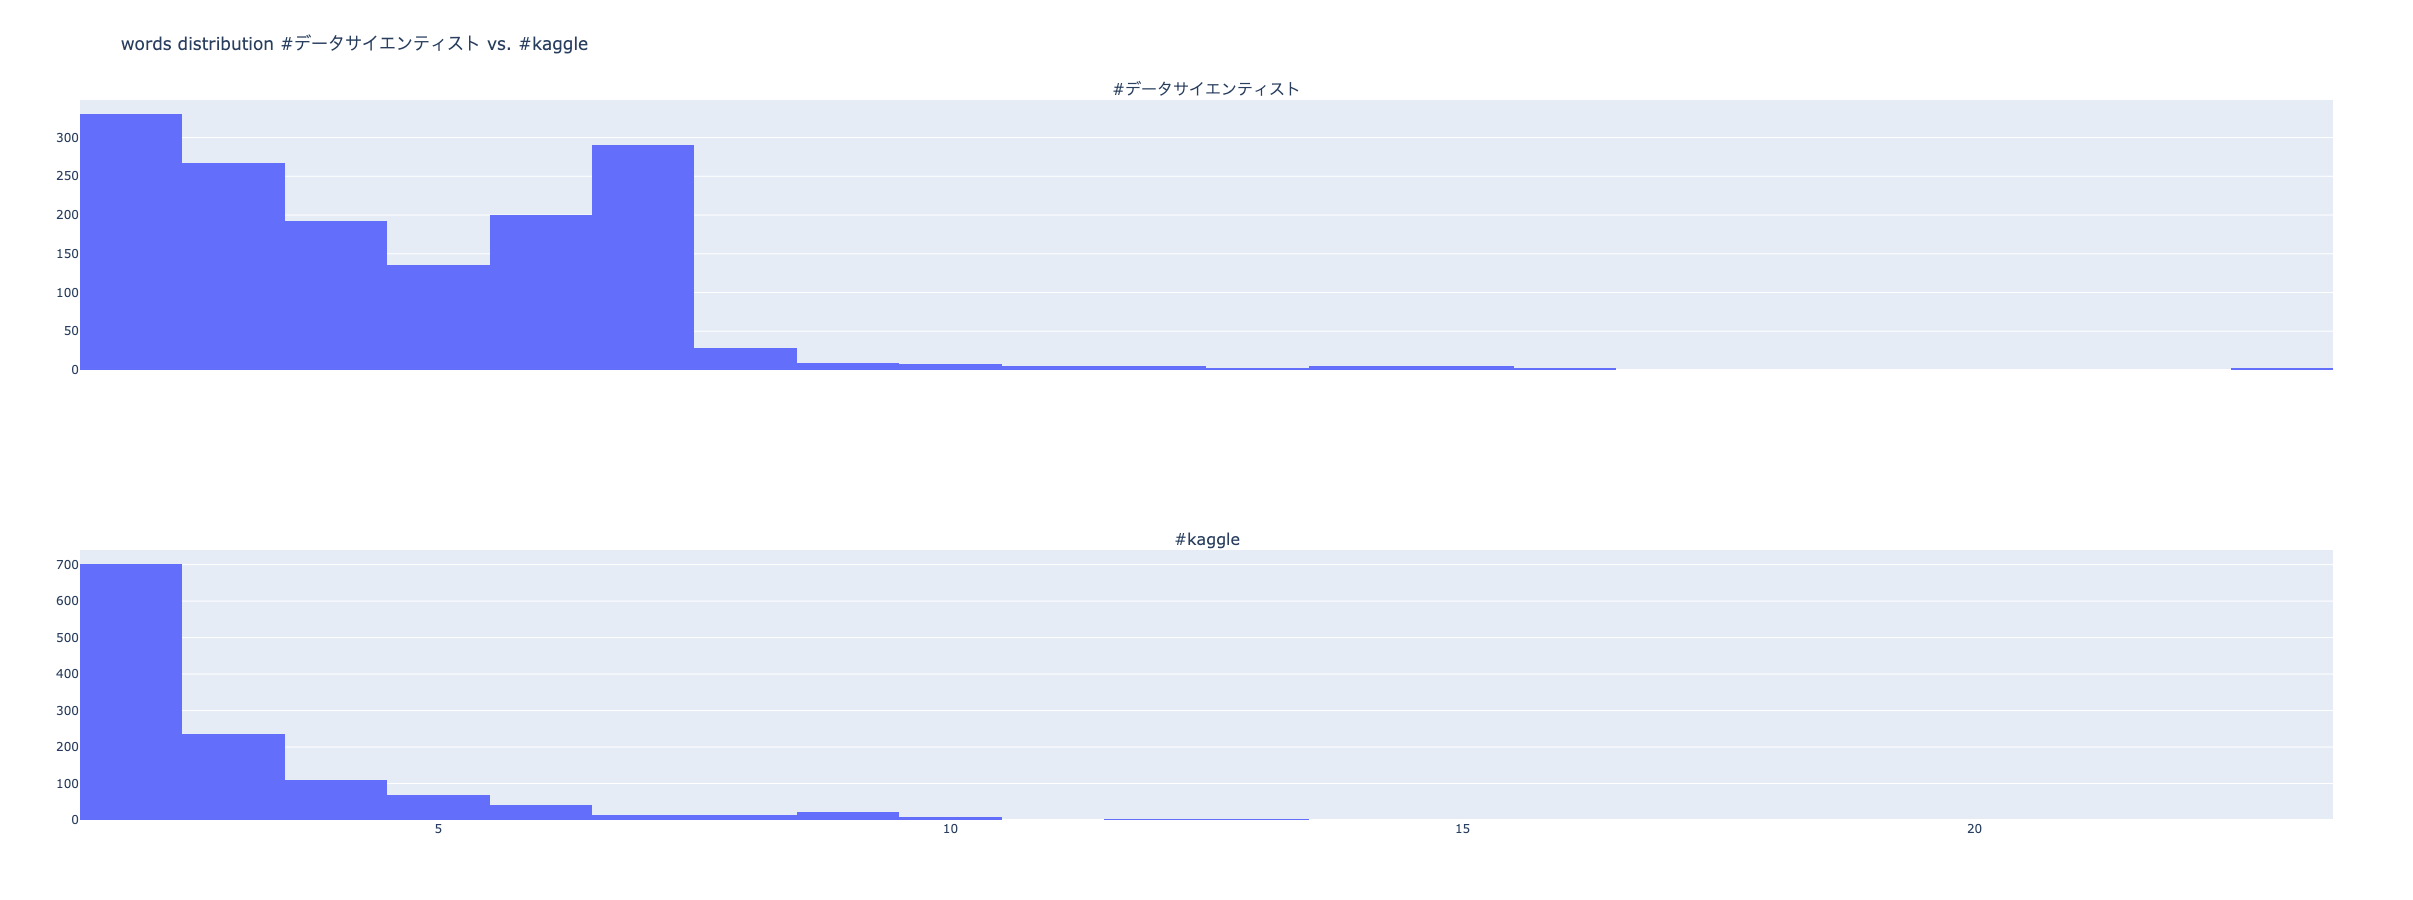

In [16]:
trace1 = fig_wd_ds['data'][0]
trace2 = fig_wd_kaggle['data'][0]

fig = make_subplots(rows=2, cols=1, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=True)

fig.update_layout(height=900, width=1200, title_text='words distribution #データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

plotly.offline.plot(fig, filename='words distribution #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

## tree map

100%|██████████| 2713/2713 [00:00<00:00, 43280.54it/s]


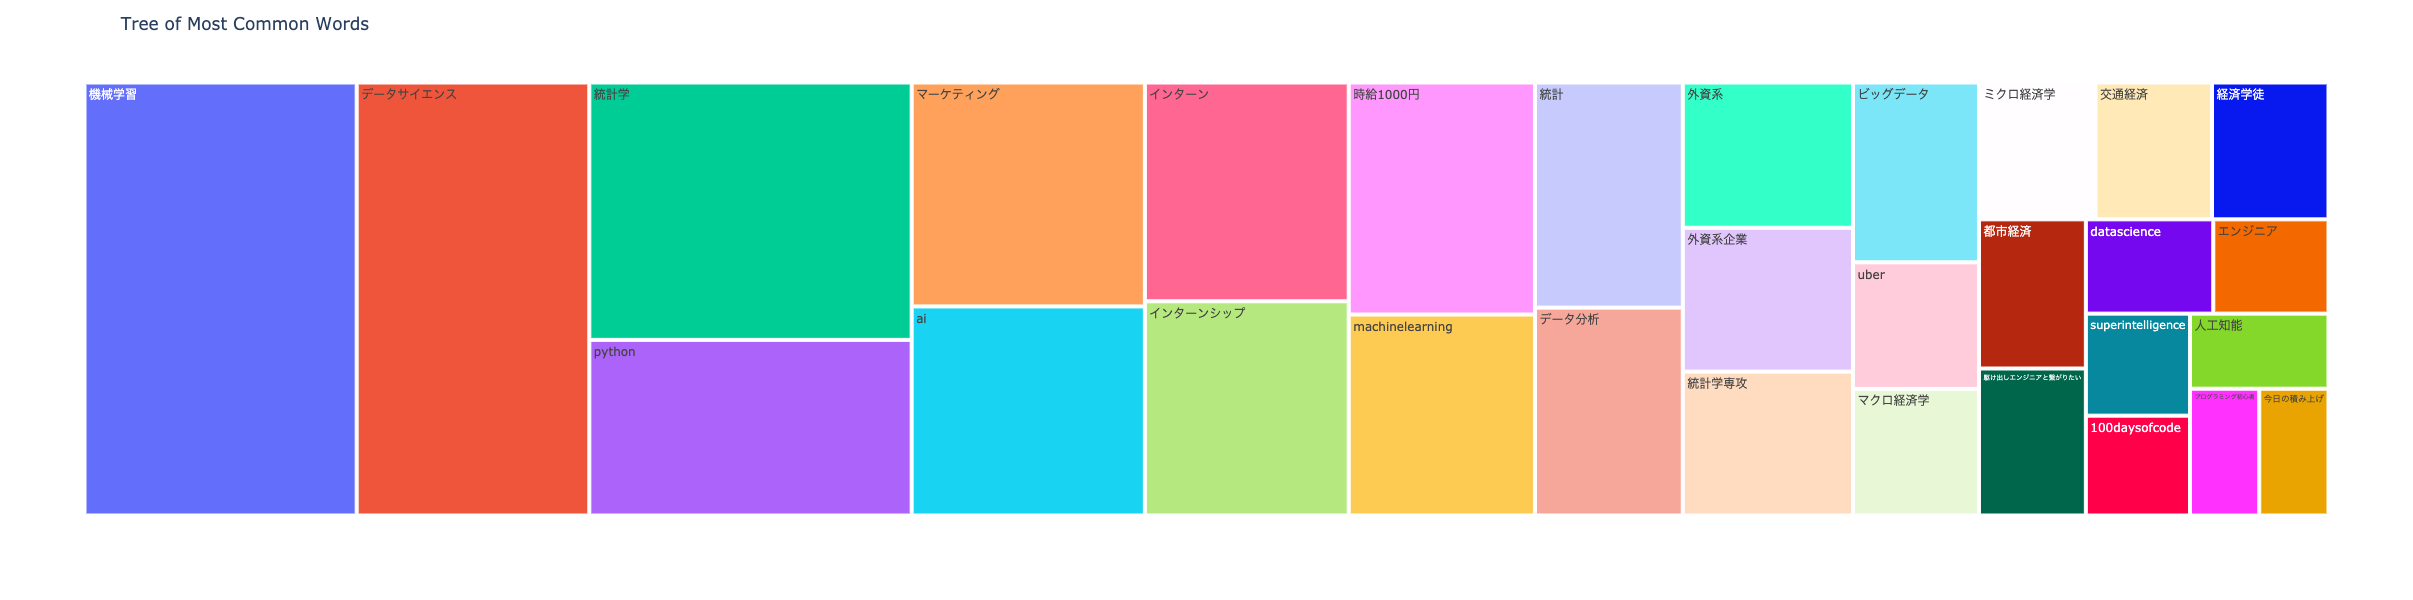

In [18]:
npt.treemap(
    stopwords=stopwords,
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    width=1300,
    height=600,
    verbose=True,
    save=False
)

## word cloud

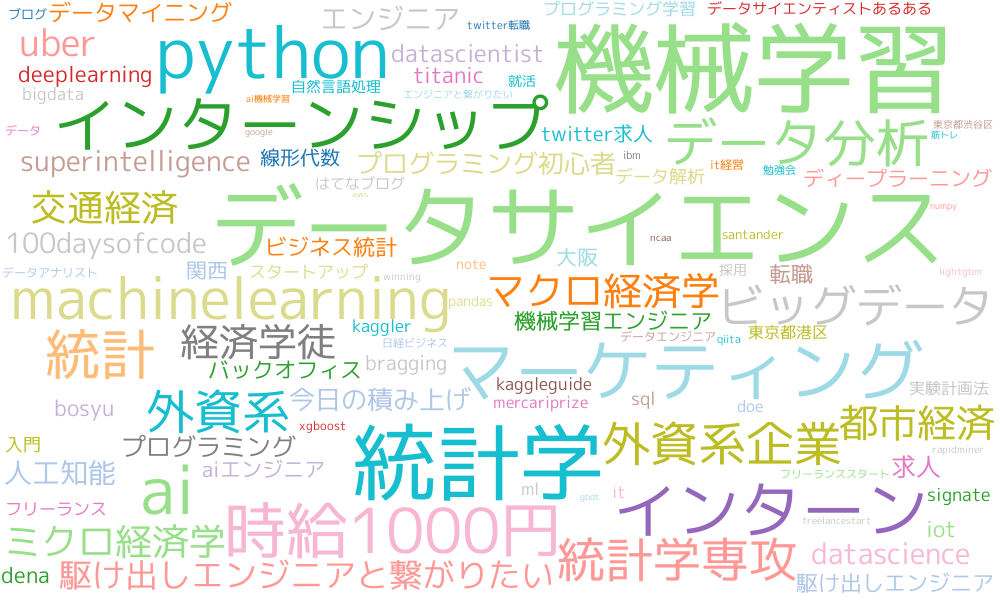

In [12]:
npt.wordcloud(
    stopwords=stopwords,
    width=1000,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

## 共起ネットワーク

In [20]:
npt.build_graph(stopwords=stopwords, min_edge_frequency=11)
npt_ds.build_graph(stopwords=stopwords, min_edge_frequency=7)
npt_kaggle.build_graph(stopwords=stopwords, min_edge_frequency=5)

node_size:48, edge_size:96
node_size:47, edge_size:100
node_size:42, edge_size:105


In [22]:
# ネットワークの元となるデータフレーム 
display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

id  id_code  adjacency_frequency  betweeness_centrality  \
0  駆け出しエンジニアと繋がりたい        0                    3                  0.035   
1               統計        1                    4                  0.000   
2              doe        2                    3                  0.000   
3             人工知能        3                    2                  0.000   
4          時給1000円        4                    5                  0.000   

   clustering_coefficient  community  
0                   0.333          2  
1                   1.000          1  
2                   1.000          0  
3                   1.000          0  
4                   1.000          1

(48, 6)

source    target  edge_frequency  source_code  target_code
0  データサイエンス       統計学             225           39           46
1     インターン  データサイエンス             188           45           39
2   マーケティング       統計学             188           11           46
3  データサイエンス   マーケティング             188           39           11
4   マーケティング   時給1000円             187           11            4

(96, 5)

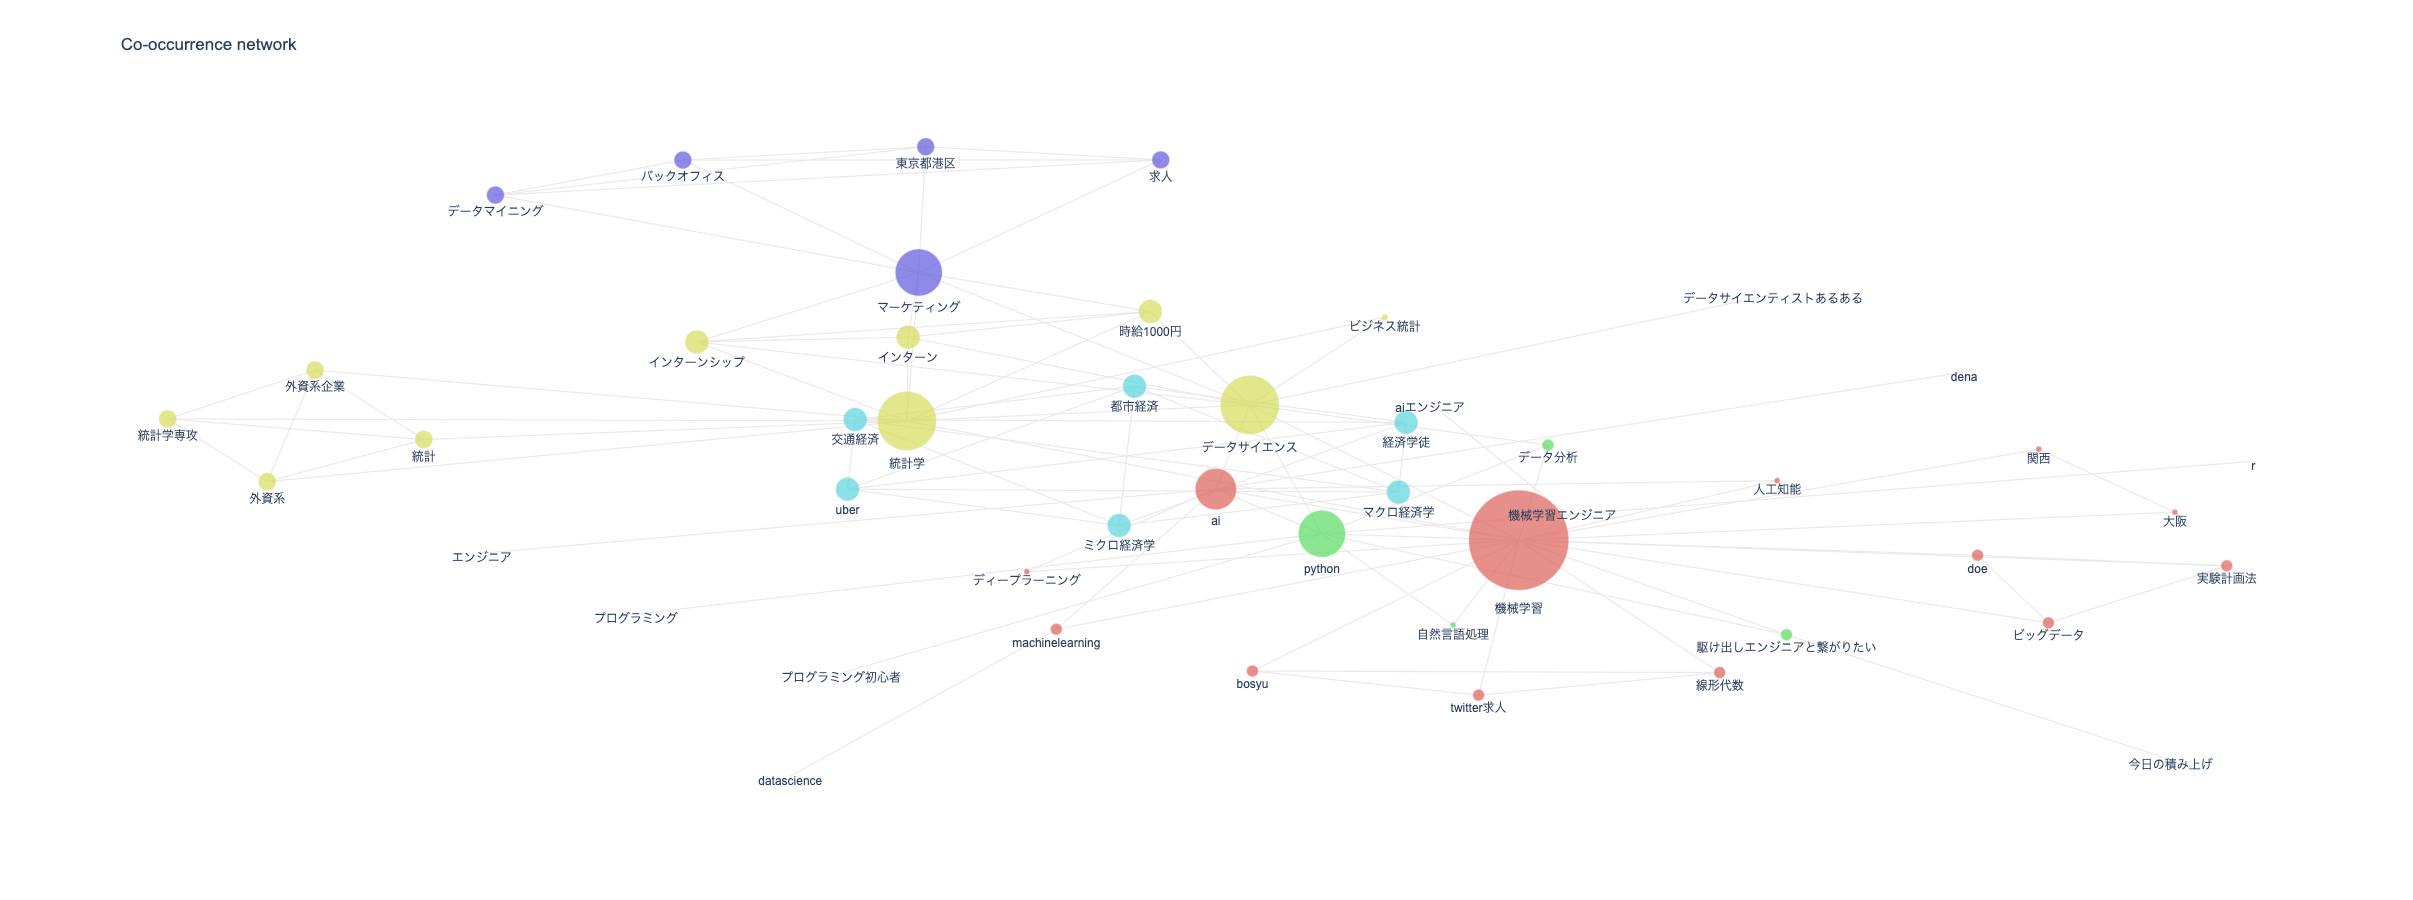

In [23]:
npt.co_network(
    title='Co-occurrence network',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=900,
    save=False
)

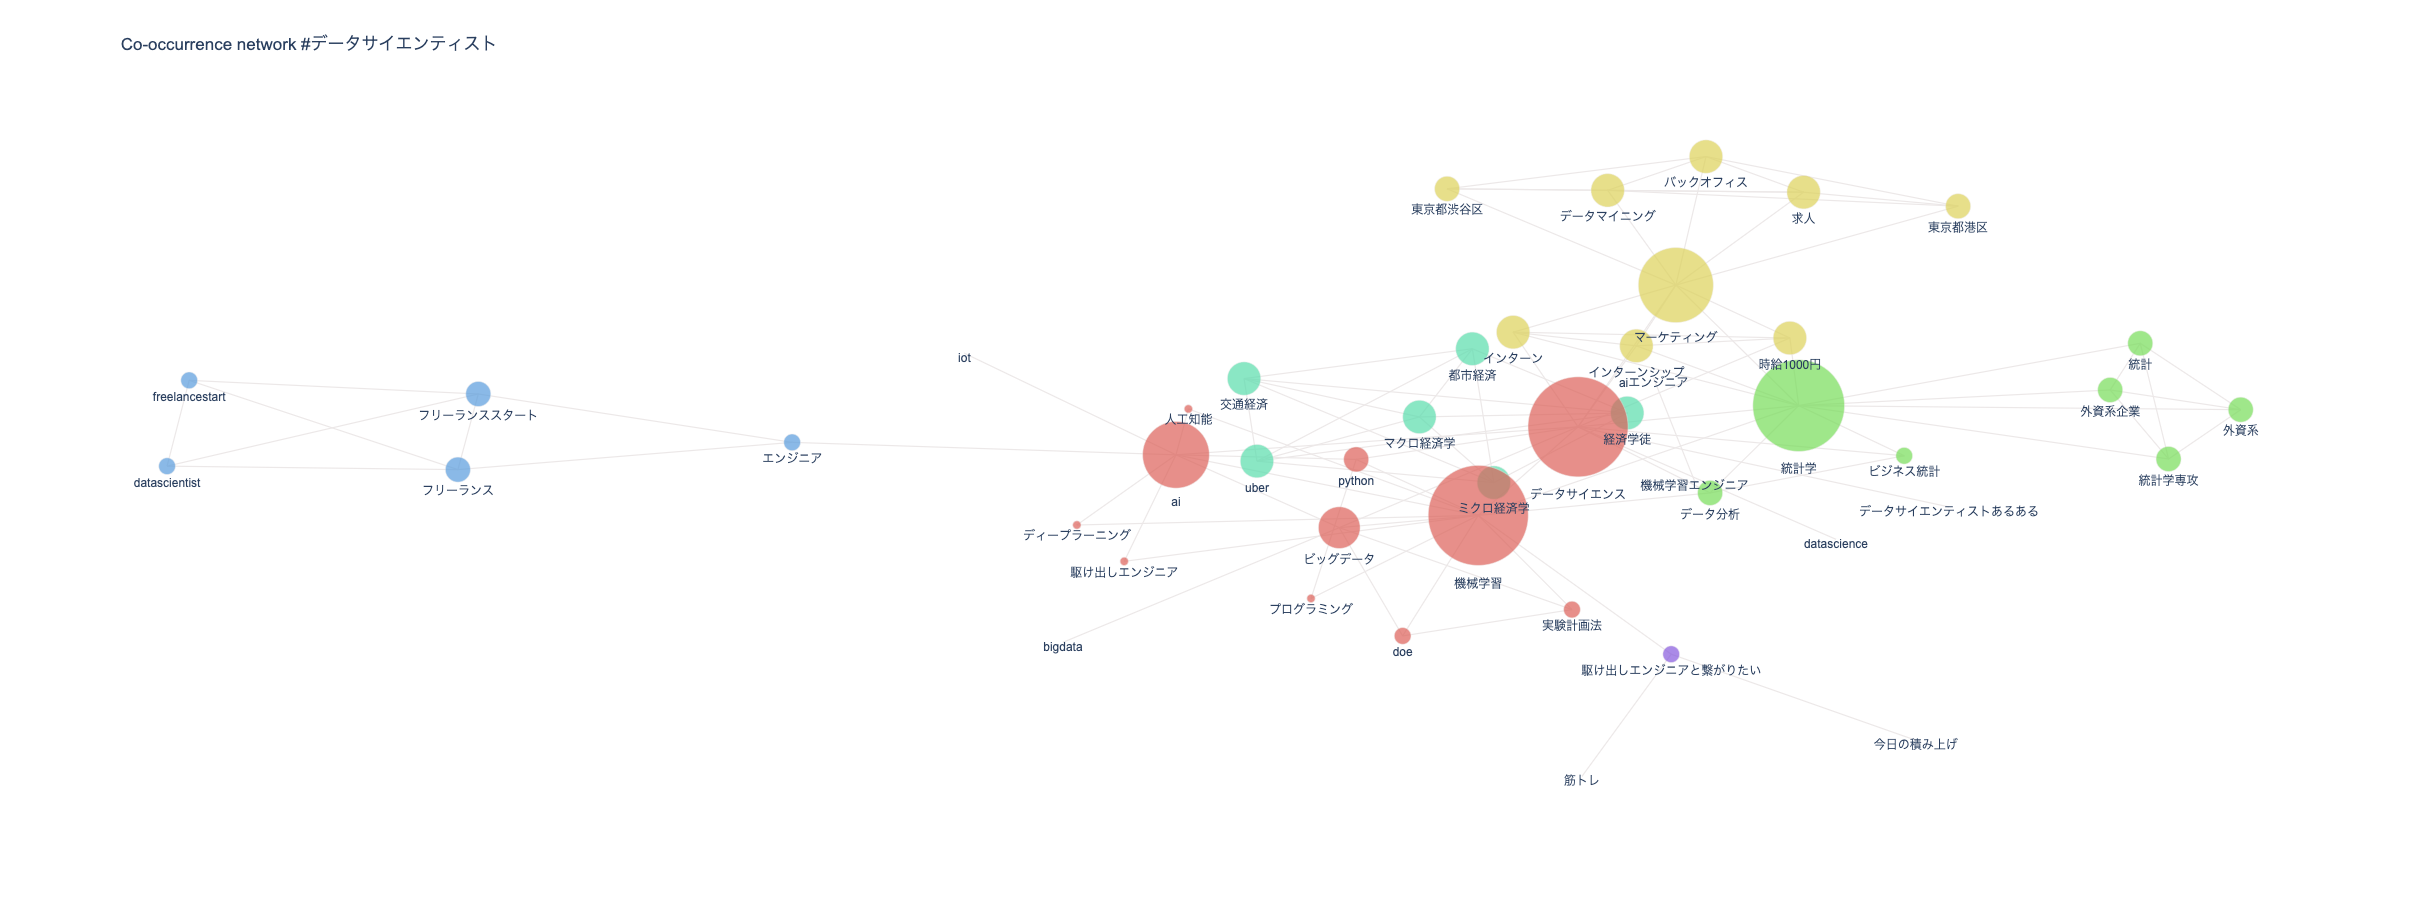

In [24]:
npt_ds.co_network(
    title='Co-occurrence network #データサイエンティスト',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=900,
    save=False
)

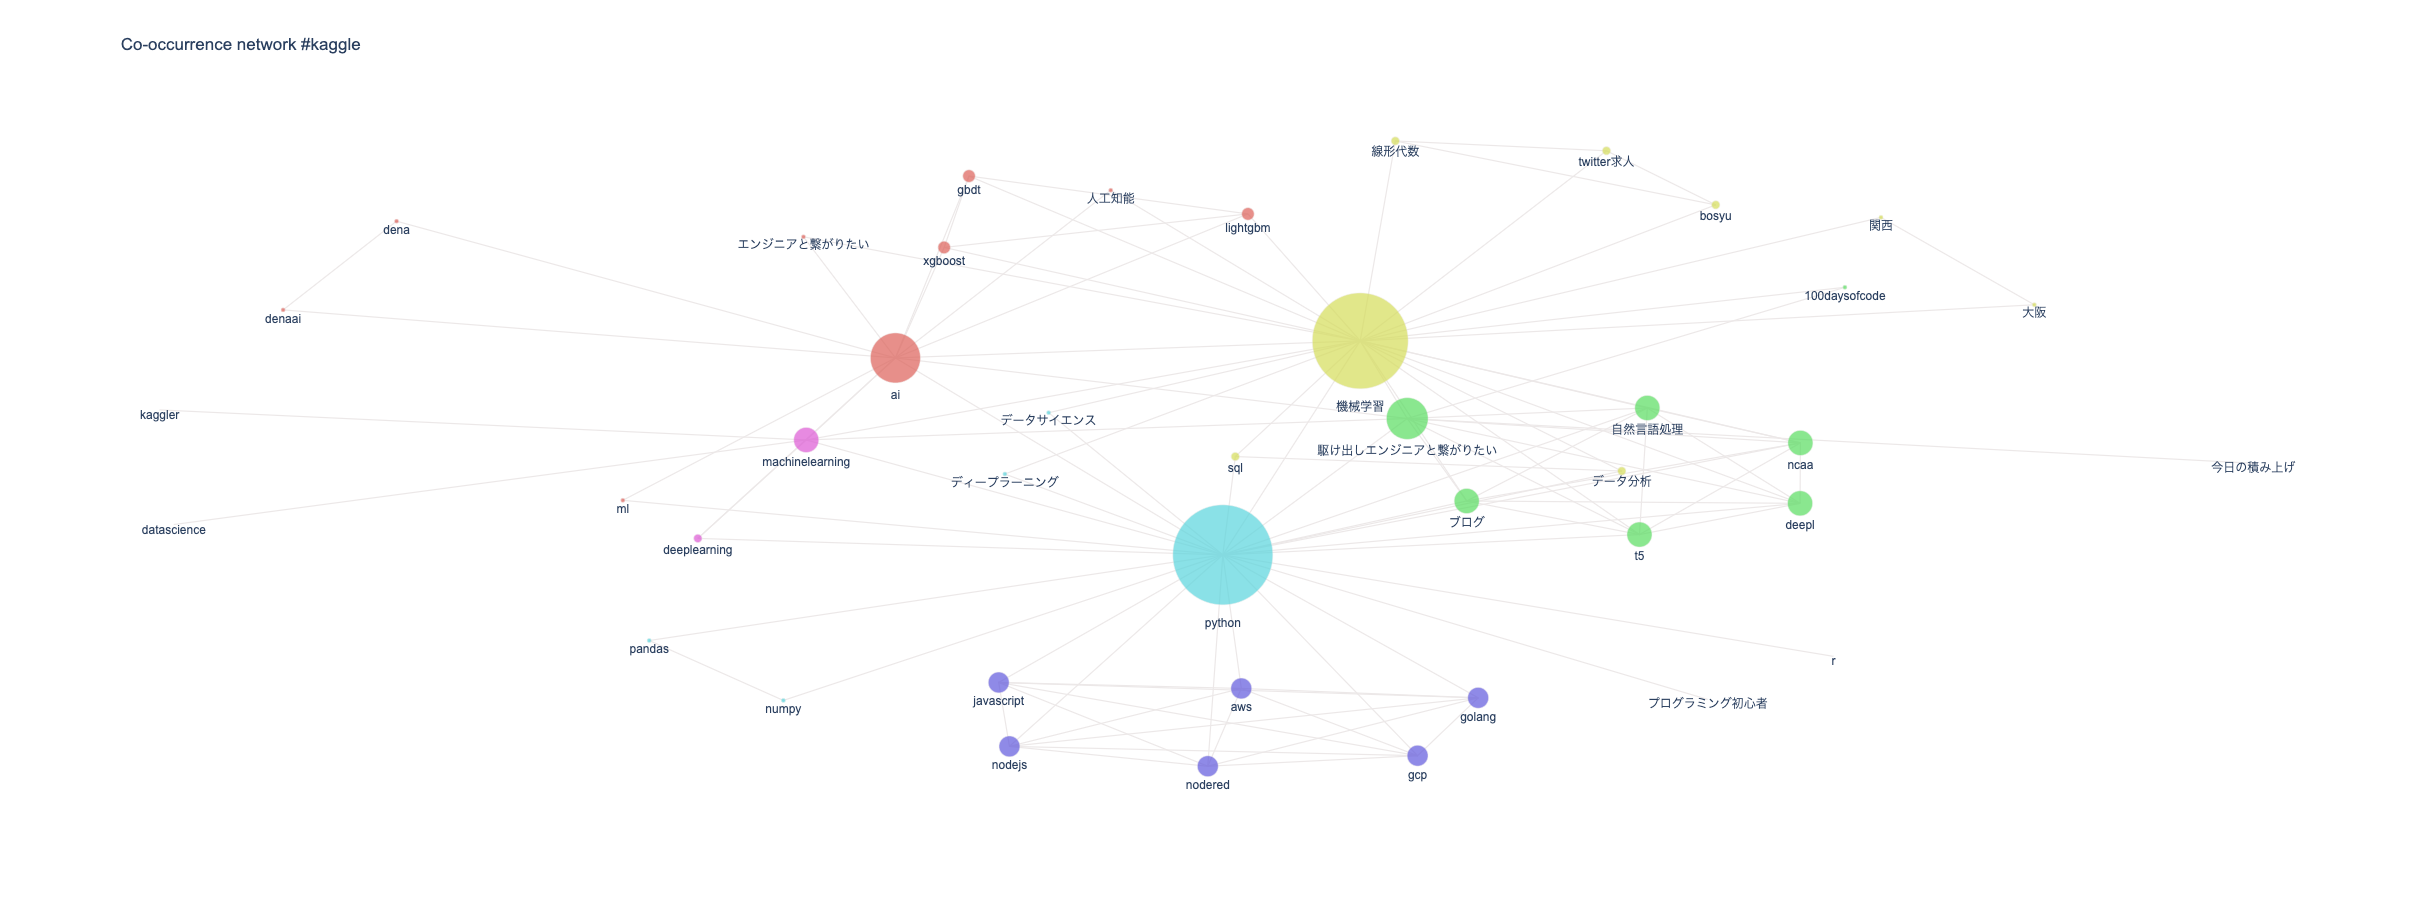

In [25]:
npt_kaggle.co_network(
    title='Co-occurrence network #kaggle',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=900,
    save=False
)

## sunburst

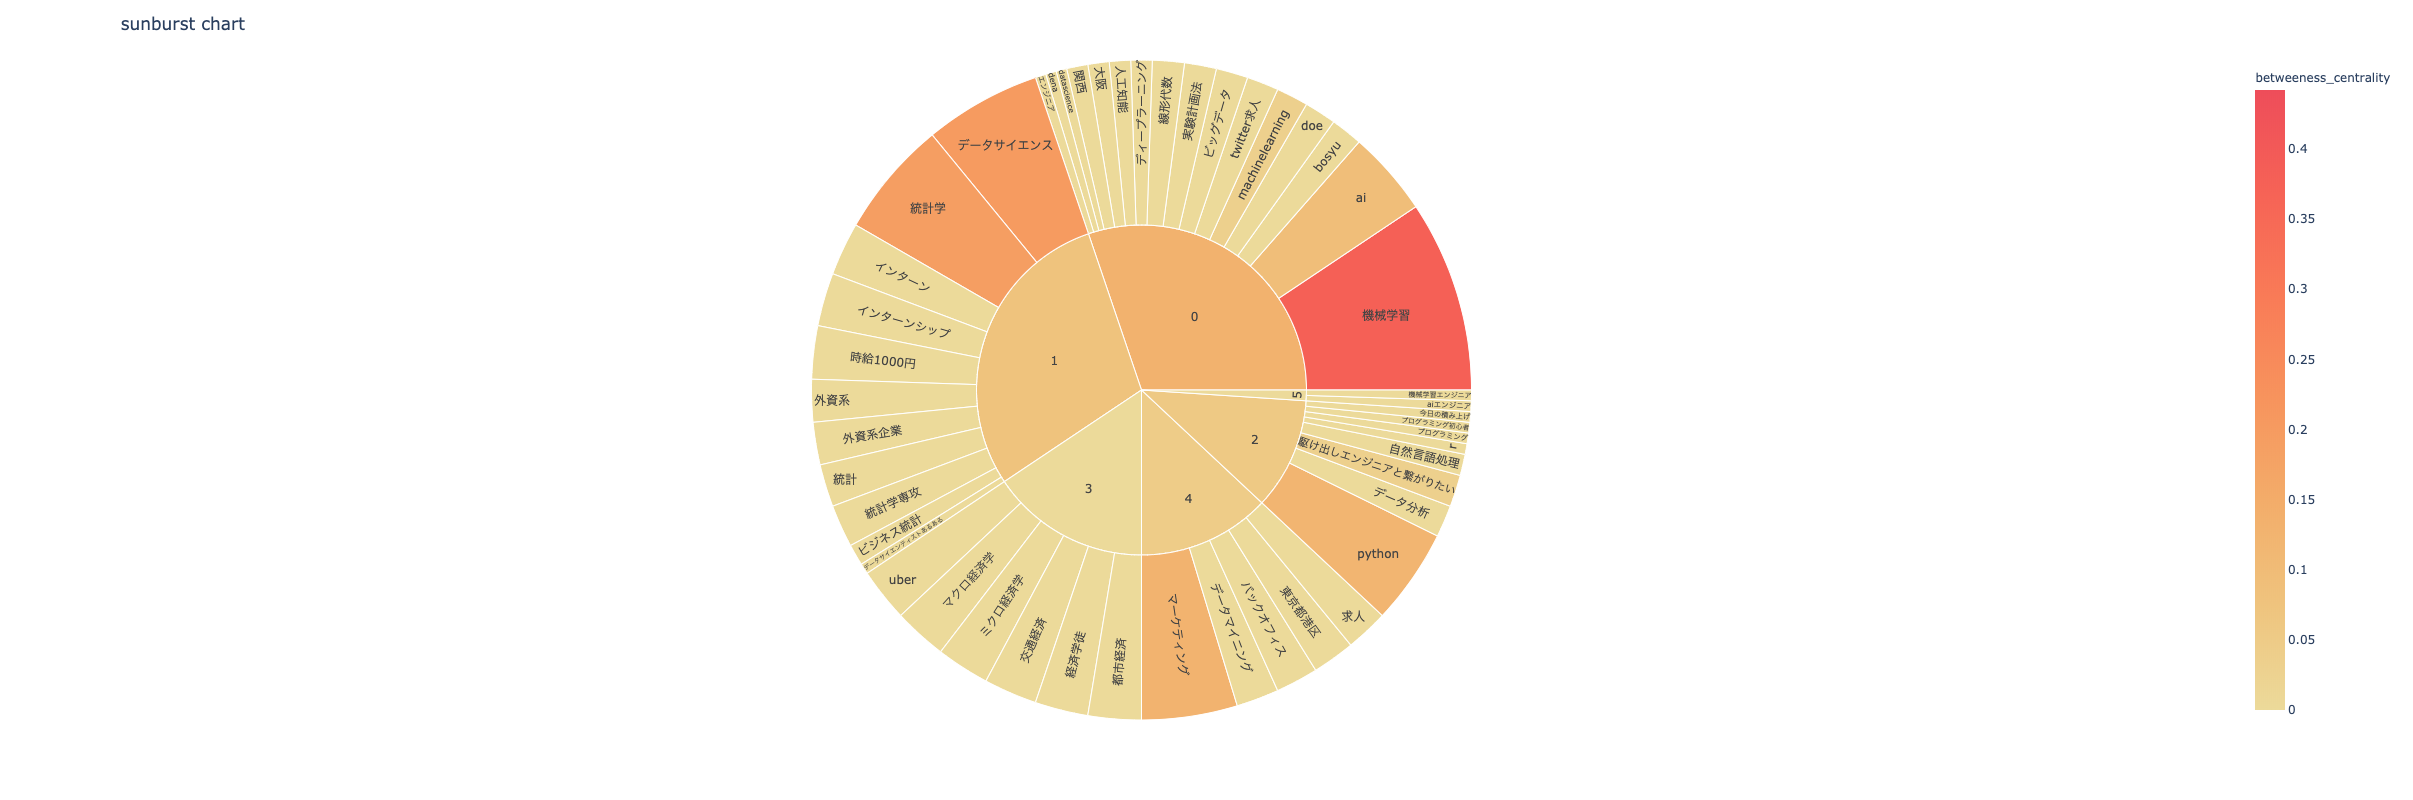

In [26]:
npt.sunburst(
    title='sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

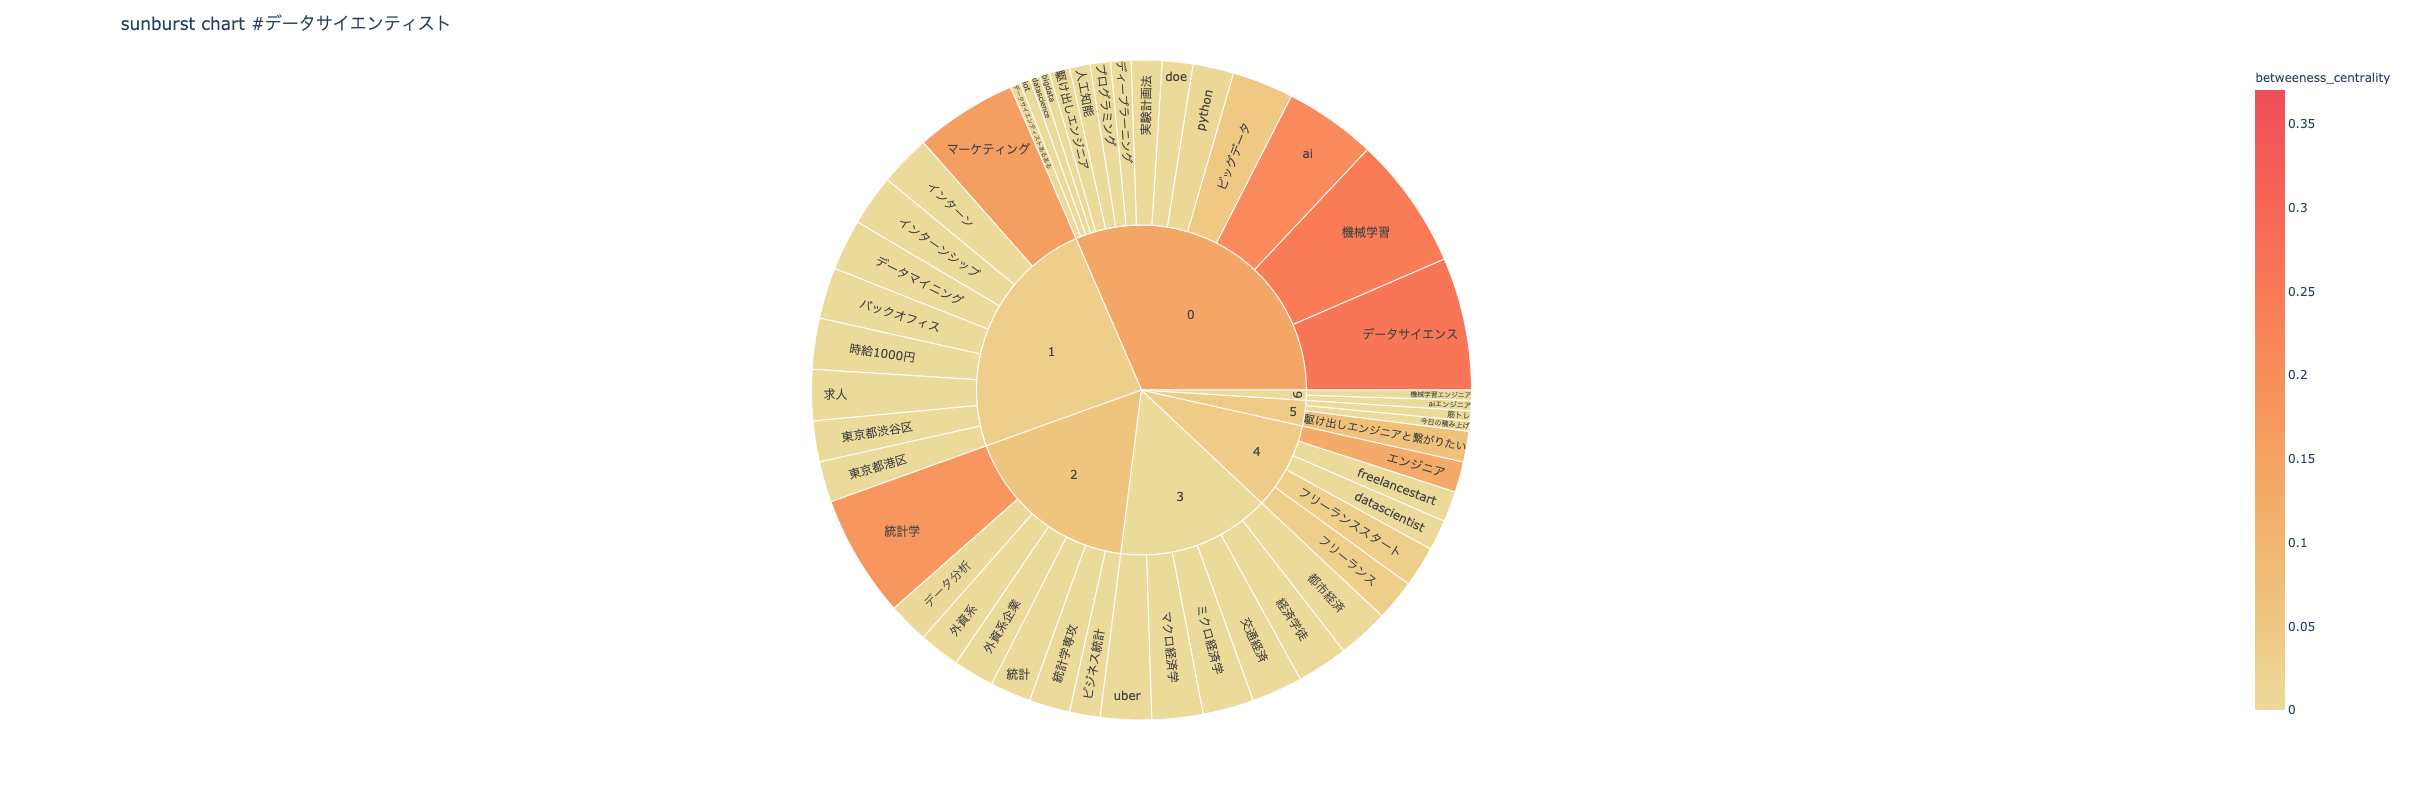

In [27]:
npt_ds.sunburst(
    title='sunburst chart #データサイエンティスト',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

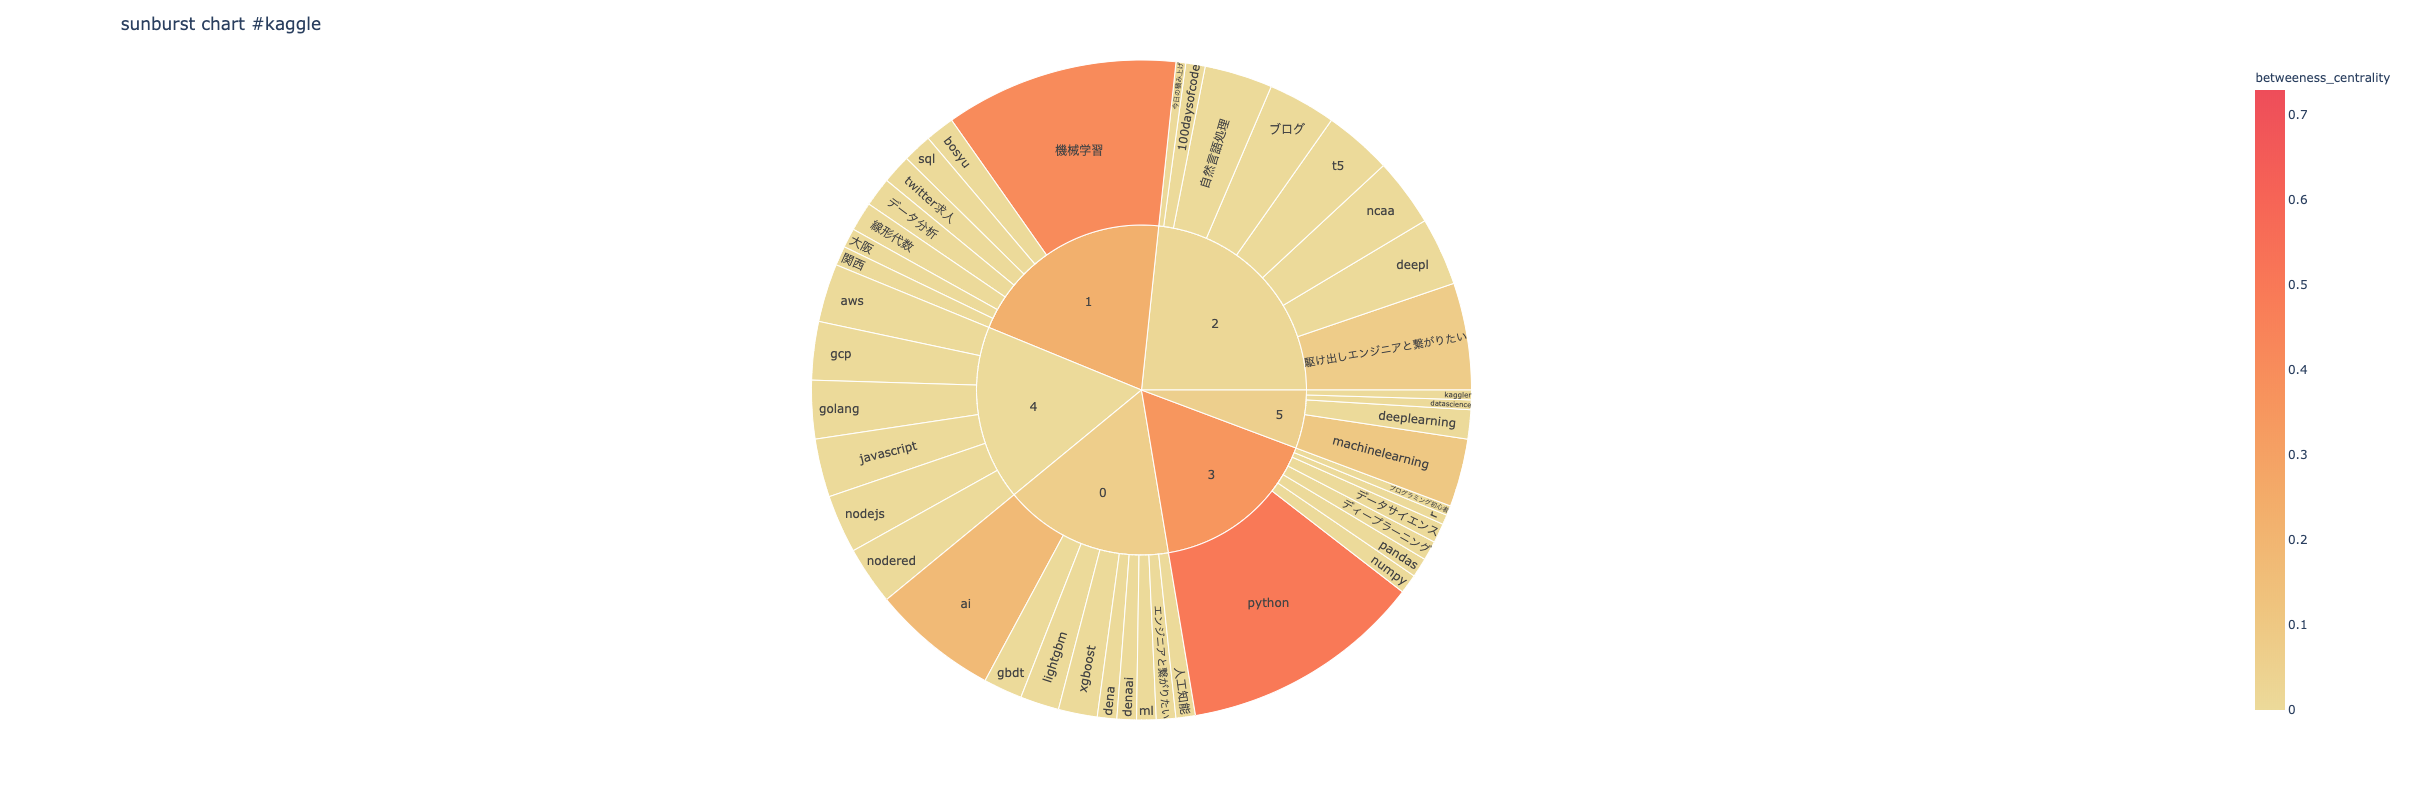

In [28]:
npt_kaggle.sunburst(
    title='sunburst chart #kaggle',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

## LDA

In [5]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [6]:
npt.ldavis(num_topics=2, passes=2, save=True)

PreparedData(topic_coordinates=           x     y  topics  cluster   Freq
topic                                     
0      0.085 0.000       1        1 55.547
1     -0.085 0.000       2        1 44.453, topic_info=     Category     Freq                Term    Total  loglift  logprob
205   Default 1118.000              kaggle 1118.000   30.000   30.000
0     Default 1254.000         データサイエンティスト 1254.000   29.000   29.000
72    Default  151.000     machinelearning  151.000   28.000   28.000
36    Default  224.000              python  224.000   27.000   27.000
83    Default  185.000             マーケティング  185.000   26.000   26.000
8     Default  360.000            データサイエンス  360.000   25.000   25.000
84    Default  153.000             時給1000円  153.000   24.000   24.000
82    Default  155.000            インターンシップ  155.000   23.000   23.000
81    Default  158.000               インターン  158.000   22.000   22.000
93    Default   99.000               外資系企業   99.000   21.000   21.000
92    Default   99.000                 外資系   99.000   20.000   20.000
95    Default   98.000               統計学専攻   98.000   19.000   19.000
94    Default  131.000                  統計  131.000   18.000   18.000
124   Default   81.000              ビッグデータ   81.000   17.000   17.000
21    Default  447.000                機械学習  447.000   16.000   16.000
1209  Default   43.000   superintelligence   43.000   15.000   15.000
18    Default  187.000                  ai  187.000   14.000   14.000
412   Default   57.000                経済学徒   57.000   13.000   13.000
343   Default   25.000        deeplearning   25.000   12.000   12.000
410   Default   57.000              ミクロ経済学   57.000   11.000   11.000
26    Default   23.000                 iot   23.000   10.000   10.000
9     Default   25.000            データマイニング   25.000    9.000    9.000
1197  Default   19.000            bragging   19.000    8.000    8.000
518   Default   21.000              ビジネス統計   21.000    7.000    7.000
371   Default   22.000             バックオフィス   22.000    6.000    6.000
373   Default   29.000                  求人   29.000    5.000    5.000
409   Default   58.000              マクロ経済学   58.000    4.000    4.000
206   Default   26.000             titanic   26.000    3.000    3.000
489   Default   20.000                  大阪   20.000    2.000    2.000
152   Default   20.000                  関西   20.000    1.000    1.000
84     Topic1  148.139             時給1000円  153.243    0.554   -3.685
83     Topic1  177.831             マーケティング  185.208    0.547   -3.502
82     Topic1  148.513            インターンシップ  155.066    0.545   -3.682
81     Topic1  150.362               インターン  158.540    0.535   -3.670
9      Topic1   23.902            データマイニング   25.353    0.529   -5.509
124    Topic1   75.828              ビッグデータ   81.049    0.521   -4.355
518    Topic1   19.889              ビジネス統計   21.288    0.520   -5.693
211    Topic1   12.205                 doe   13.106    0.517   -6.181
212    Topic1   12.097               実験計画法   13.123    0.507   -6.190
371    Topic1   21.144             バックオフィス   22.969    0.505   -5.632
372    Topic1   12.071               東京都港区   13.127    0.504   -6.192
154    Topic1   11.287     データサイエンティストあるある   12.312    0.501   -6.260
474    Topic1    7.417              東京都渋谷区    8.225    0.484   -6.680
1557   Topic1   11.830        mercariprize   13.166    0.481   -6.213
620    Topic1   16.955             aiエンジニア   18.935    0.477   -5.853
63     Topic1    8.825                it経営    9.882    0.475   -6.506
373    Topic1   26.401                  求人   29.658    0.472   -5.410
48     Topic1    7.331      freelancestart    8.239    0.471   -6.691
52     Topic1    5.822                案件相場    6.598    0.463   -6.922
8      Topic1  316.468            データサイエンス  360.666    0.457   -2.926
412    Topic1   50.329                経済学徒   57.830    0.449   -4.765
522    Topic1    5.022               データ活用    5.785    0.447   -7.069
645    Topic1    4.300           エクスプロラトリー    4.959    0.445   -7.225
399  